In [ ]:
import os
import cv2
import numpy as np
from glob import glob
from scipy.spatial.distance import euclidean
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
from zipfile import ZipFile

In [ ]:
# Extract the ZIP file to a folder named Corel1k_MSD
zip_file_path = '/content/Corel1k_MSD.zip'  # Replace with your actual path
extracted_folder = '/content/Corel1k_MSD'
os.makedirs(extracted_folder, exist_ok=True)

# Extract the ZIP file
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

In [ ]:
# Function to load images from the extracted folder
def load_images_from_folder(folder_path, img_size=(128, 128)):
    images = []
    image_paths = glob(os.path.join(folder_path, '*'))
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)
        images.append((img_path, img))
    return images

In [ ]:
# Function to compute the MicroStructureDescriptor (MSD)
def compute_msd_descriptor(image):
    channels = cv2.split(image)
    msd = []
    for channel in channels:
        mean, std = cv2.meanStdDev(channel)
        msd.append(mean[0][0])  # Add mean
        msd.append(std[0][0])   # Add standard deviation
    return np.array(msd)

In [ ]:
# Function to extract features using a pre-trained CNN (VGG16)
def extract_cnn_features(image):
    model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Changed input size to 224x224
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert image to RGB
    img = cv2.resize(img, (224, 224))  # Resize for VGG16 input
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = preprocess_input(img)  # Preprocess the image
    features = model.predict(img)  # Get features from VGG16
    features = features.flatten()  # Flatten the features into a vector
    return features

In [ ]:
# Load images from the dataset folder
dataset_folder = '/content/Corel1k_MSD'
images = load_images_from_folder(dataset_folder)

In [ ]:
import numpy as np

# Compute and save descriptors
image_descriptors = []
for img_path, img in images:
    msd_descriptor = compute_msd_descriptor(img)
    cnn_features = extract_cnn_features(img)
    combined_features = np.concatenate((msd_descriptor, cnn_features))
    image_descriptors.append((img_path, combined_features))



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step
1

In [ ]:
# Function to calculate similarity using Euclidean distance
def calculate_similarity(query_descriptor, descriptors):
    similarities = []
    for img_path, descriptor in descriptors:
        distance = euclidean(query_descriptor, descriptor)
        similarities.append((img_path, distance))
    similarities.sort(key=lambda x: x[1])  # Sort by distance (lower is more similar)
    return similarities

In [ ]:
# Allow user to input the path of the query image
query_image_path = '/content/Corel1k_MSD/317.jpg'


# Read and process the query image
query_image = cv2.imread(query_image_path)
query_image = cv2.resize(query_image, (128, 128))  # Resize to match dataset images

NameError: name 'cv2' is not defined

In [ ]:
# Compute MSD and CNN features for the query image
msd_descriptor = compute_msd_descriptor(query_image)
cnn_features = extract_cnn_features(query_image)
query_descriptor = np.concatenate((msd_descriptor, cnn_features))  # Combine the features

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


In [ ]:
# Calculate similarities
similar_images = calculate_similarity(query_descriptor, image_descriptors)

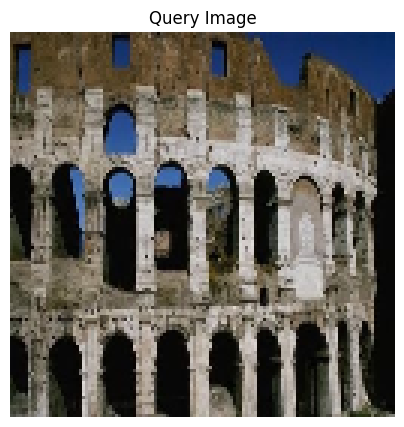

In [ ]:
# Display the query image
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
plt.title("Query Image")
plt.axis('off')
plt.show()

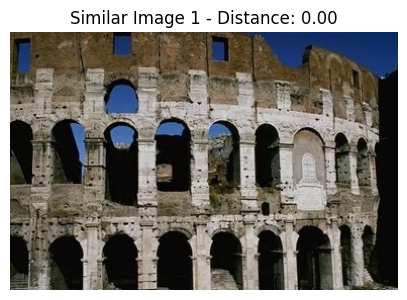

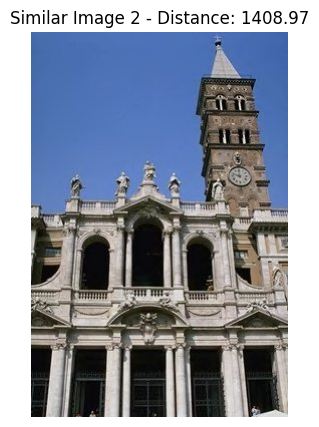

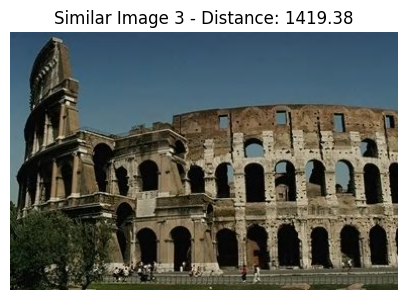

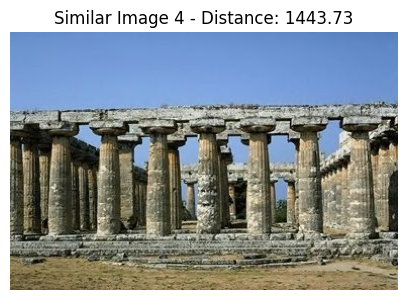

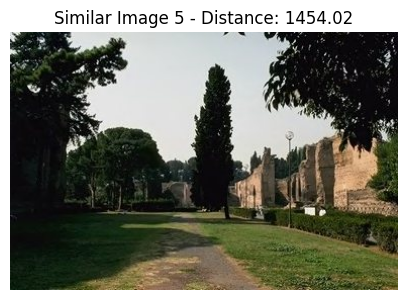

In [ ]:
# Display top 5 most similar images
top_n = 5
for i, (img_path, distance) in enumerate(similar_images[:top_n]):
    similar_img = cv2.imread(img_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(similar_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Similar Image {i+1} - Distance: {distance:.2f}")
    plt.axis('off')
    plt.show()

In [ ]:
def precision_at_k(query_descriptor, k=5):
    relevant_count = 0
    for img_path, descriptor in image_descriptors:
        if is_relevant(img_path):  # Assume a function `is_relevant`
            relevant_count += 1
    return relevant_count / k

# Placeholder for testing:
def is_relevant(img_path):
    return "expected_label" in img_path


<ipython-input-39-09698a8df1c9>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(features_2d[:, 0], features_2d[:, 1], cmap='viridis', alpha=0.5)


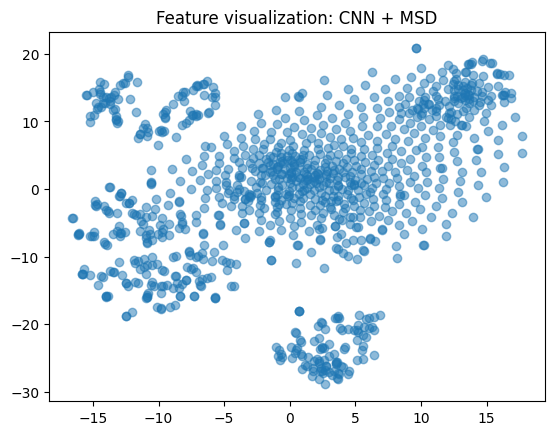

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

all_features = np.array([desc for _, desc in image_descriptors])
labels = [img_path for img_path, _ in image_descriptors]

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(all_features)

# Plotting
plt.scatter(features_2d[:, 0], features_2d[:, 1], cmap='viridis', alpha=0.5)
plt.title("Feature visualization: CNN + MSD")
plt.show()


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model without the top layer (for feature extraction)
cnn_model = VGG16(weights='imagenet', include_top=False)

# Example: check the model summary
cnn_model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2005 (InputLayer)        │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

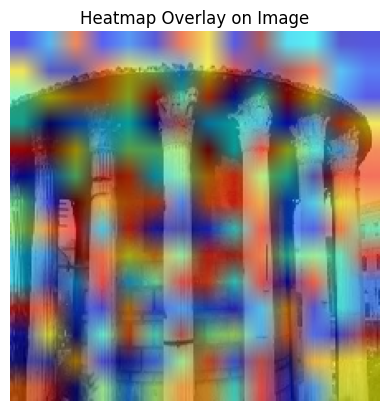

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def overlay_heatmap_on_image(image, heatmap, alpha=0.5):
    """
    Overlays a heatmap on an image.
    - image: The original image (numpy array)
    - heatmap: The heatmap (numpy array)
    - alpha: Transparency of the heatmap (default 0.5)
    """
    # Normalize the heatmap to be in the range [0, 255]
    heatmap = np.uint8(255 * heatmap)  # Scale to [0, 255]
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # Convert to a color map

    # Resize the heatmap to match the image size
    heatmap_resized = cv2.resize(heatmap, (image.shape[1], image.shape[0]))

    # Ensure both image and heatmap are of the same type (uint8)
    image = np.uint8(image)

    # Blend the heatmap with the original image
    superimposed_img = cv2.addWeighted(image, 1 - alpha, heatmap_resized, alpha, 0)
    return superimposed_img

# Load your image (replace 'image_path' with the path to your image)
img_path = '/content/Corel1k_MSD/207.jpg'  # Replace with your image path
original_img = image.load_img(img_path, target_size=(224, 224))
original_img = image.img_to_array(original_img)

# Generate the heatmap (replace with your method of generating the heatmap)
heatmap = np.random.random((14, 14))  # Example random heatmap, replace with your actual heatmap

# Overlay the heatmap on the original image
superimposed_image = overlay_heatmap_on_image(original_img, heatmap, alpha=0.6)

# Display the result
plt.imshow(superimposed_image.astype('uint8'))
plt.title('Heatmap Overlay on Image')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step


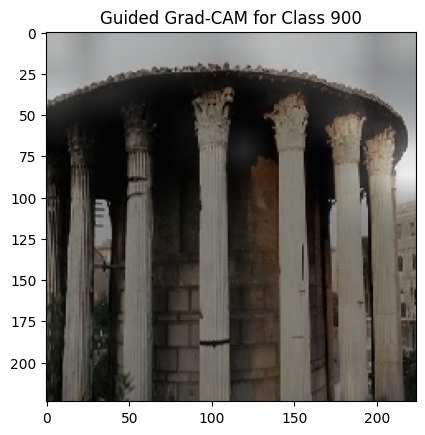

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model
model = tf.keras.applications.VGG16(weights='imagenet')

# Prepare an image to test the model
img_path = '/content/Corel1k_MSD/207.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.vgg16.preprocess_input(img_array)

# Get model predictions and the class label
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Get the output layer and its gradient
last_conv_layer = model.get_layer('block5_conv3')  # This is the last conv layer in VGG16
grad_model = Model([model.inputs], [last_conv_layer.output, model.output])

# Compute the gradients with respect to the predicted class
with tf.GradientTape() as tape:
    last_conv_layer_output, preds = grad_model(img_array)
    class_channel = preds[:, predicted_class]

# Get the gradient of the class with respect to the last convolutional layer
grads = tape.gradient(class_channel, last_conv_layer_output)

# Compute the Guided Grad-CAM
guided_grads = tf.multiply(grads, tf.cast(last_conv_layer_output > 0, 'float32'))
pooled_grads = tf.reduce_mean(guided_grads, axis=(0, 1, 2))

# Compute the Guided Grad-CAM image
heatmap = np.mean(last_conv_layer_output[0] * pooled_grads, axis=-1)

# Resize heatmap to match the input image size (224x224)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)  # Normalize the heatmap

# Resize the heatmap to match the original image size (224, 224)
heatmap = cv2.resize(heatmap, (224, 224))  # Resize heatmap to match original image size

# Convert heatmap to RGB
heatmap = np.uint8(255 * heatmap)  # Scale to [0, 255]
heatmap = np.expand_dims(heatmap, axis=-1)  # Add the third dimension
heatmap = np.repeat(heatmap, 3, axis=-1)  # Convert to RGB

# Load the original image
original_img = image.load_img(img_path, target_size=(224, 224))
original_img = image.img_to_array(original_img)

# Superimpose the heatmap on the original image
superimposed_img = original_img * 0.6 + heatmap * 0.4

# Display the final image
plt.imshow(superimposed_img.astype('uint8'))
plt.title(f'Guided Grad-CAM for Class {predicted_class}')
plt.show()


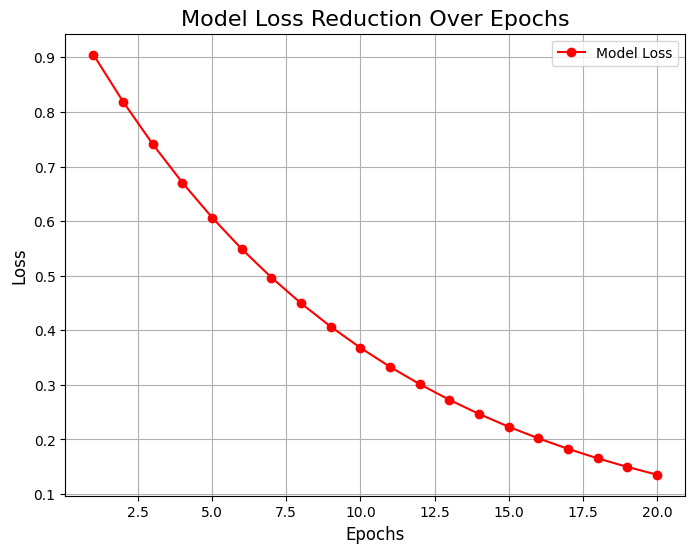

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating loss reduction over epochs (replace with your actual loss data)
epochs = np.arange(1, 21)  # 20 epochs
loss = np.exp(-0.1 * epochs)  # Simulated exponential loss reduction

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, marker='o', linestyle='-', color='r', label='Model Loss')

# Adding labels and title
plt.title('Model Loss Reduction Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True)
plt.legend()

# Display the plot
plt.show()
